# 지도 학습
---

In [1]:
# 기본 모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

## 3. 지도 학습 알고리즘
==================================================
### 3.5 결정 트리(Decision Tree)
 - 분류와 회귀 문제에 널리 사용하는 모델
 - 결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습
 - 모든 트리기반 '회귀'모델은 외삽(훈련 데이터 범위 밖의 데이터)에 대해 예측 불가능

#### 결정 트리 만들기
 - 노드(Node): 질문이나 정답을 담은 네모상자
 - 루트 노드(Root Node): 맨 위의 노드, 전체 데이터
 - 리프(Leaf): 마지막 노드
 - 엣지(edge): 질문의 답과 다음 질문을 연결
 - 순수 노드(Pure Node): 타겟(클래스) 하나로만 이루어진 리프 노드
 - 각 테스트는 하나의 축을 따라 데이터를 둘로 나눔: 나누어진 영역은 항상 축에 평행

#### 결정 트리의 복잡도 제어하기
 - 모든 리프를 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해짐(훈련세트에 100% 정확, 과대적합)
 - 과대적합을 막는 전략
   - 사전 가지치기(Pre-Pruning): 트리의 최대 깊이나 리프의 최대 개수를 제한, 또는 노드 분할의 최소 데이터 수 지정
   - 사후 가지치기(Post-pruning): 트리를 만든 후 데이터가 적은 노드를 삭제하거나 병합
   - scikit-learn은 사전 가지치기만 지원(DecisionTreeRegressor, DecisionTreeClassifier)

In [2]:
# 유방암 데이터셋에서 사전 가지치기의 효과
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

# 데이터 불러오기
cancer=load_breast_cancer()

# 훈련 데이터셋과 테스트 데이터셋 나누기
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

# 모델 객체 생성 및 훈련
tree=DecisionTreeClassifier(random_state=0).fit(x_train, y_train)

# 예측
print("훈  련 세트 정확도:", tree.score(x_train, y_train))
print("테스트 세트 정정확도:", tree.score(x_test, y_test))

# 모든 리프 노드가 순수노드: 훈련세트 정확도 1

훈  련 세트 정확도: 1.0
테스트 세트 정정확도: 0.9300699300699301


In [3]:
# max_depth=None(기본값): 연속된 질문의 수 제한 

# 깊이(연속된 질문의 최대 숫자)가 4인 Tree모델 객체 생성 및 훈련
tree=DecisionTreeClassifier(max_depth=4, random_state=0).fit(x_train, y_train)

# 예측
print("훈  련 세트 정확도:", tree.score(x_train, y_train))
print("테스트 세트 정정확도:", tree.score(x_test, y_test))


훈  련 세트 정확도: 0.9953051643192489
테스트 세트 정정확도: 0.951048951048951


#### 결정 트리 분석
 - 트리 모듈의 export_graphviz(): 트리 시각화를 위한 함수
 - 그래프 저장용 텍스트 파일(.dot파일) 생성 

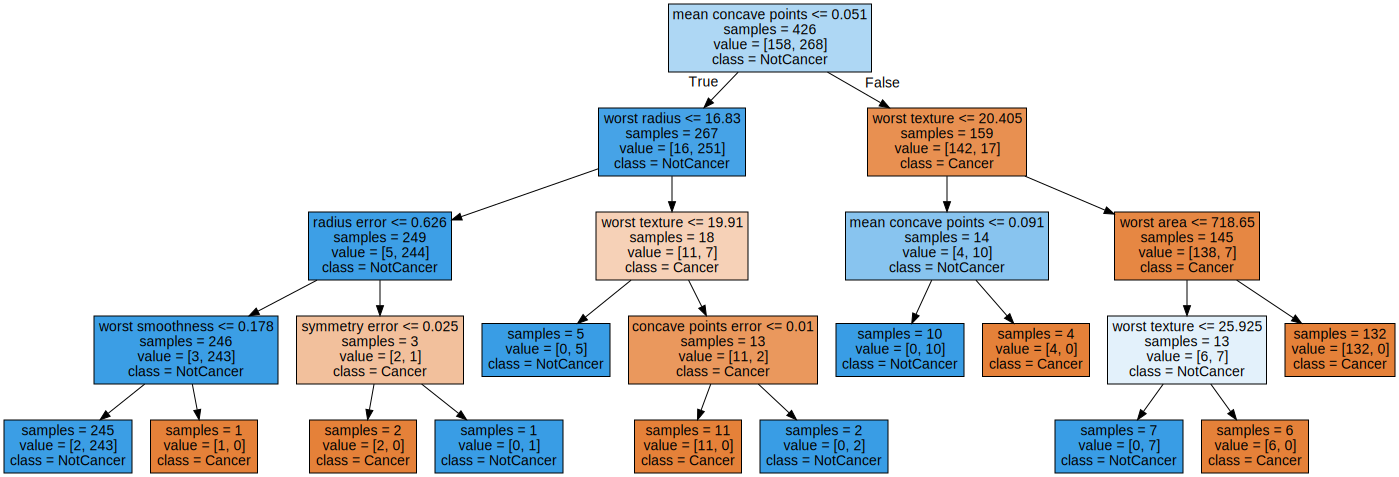

In [4]:
# 유방암 데이터셋으로 만든 결정 트리

from sklearn.tree import export_graphviz

# .dot 파일 생성
export_graphviz(tree, out_file='tree.dot', class_names=['Cancer', 'NotCancer'],
                feature_names=cancer.feature_names, impurity=False, filled=True)

# 결정트리
import graphviz

with open("tree.dot") as f:
    dot_graph=f.read()

display(graphviz.Source(dot_graph))

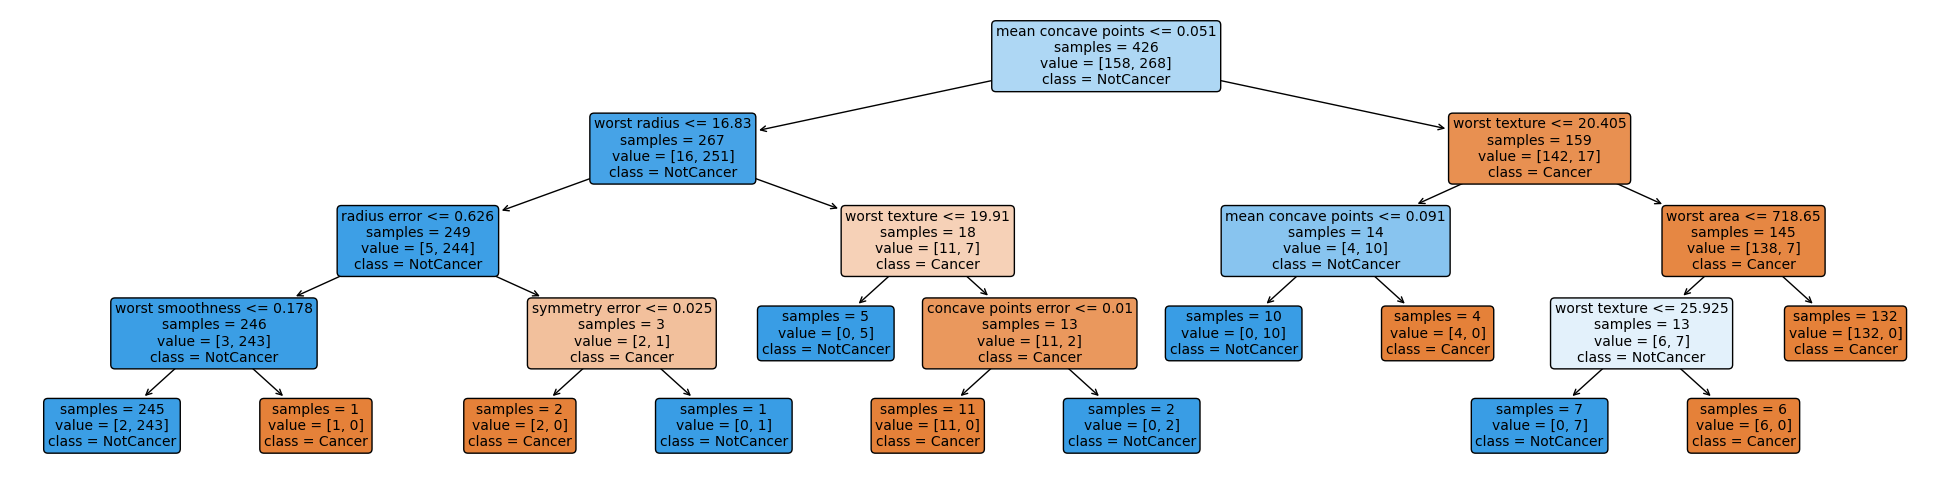

In [8]:
# .dot파일 만들지 않고 트리 그리기
from sklearn.tree import plot_tree

plt.figure(figsize=(25,6))
plot_tree(tree, class_names=['Cancer', 'NotCancer'], feature_names=cancer.feature_names,
          impurity=False, filled=True, rounded=True, fontsize=10)

plt.show()

#### 트리의 특성 중요도
 - 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 항목
 - 0~1 사이의 숫자(0:전혀 사용되지 않음, 1:완벽하게 타겟클래스 예측)

In [9]:
print('특성 중요도:\n', tree.feature_importances_)

특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.73943775 0.         0.         0.013032   0.
 0.         0.         0.         0.         0.         0.01737208
 0.00684355 0.         0.06019401 0.11783988 0.         0.03522339
 0.01005736 0.         0.         0.         0.         0.        ]


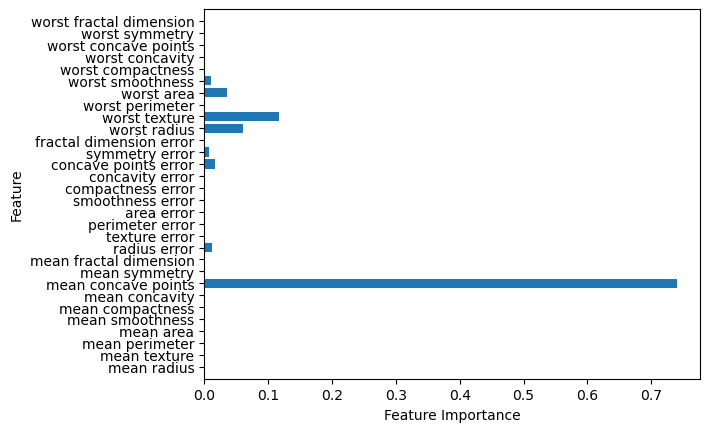

In [11]:
# 특성 중요도 시각화

def plot_feature_importances_cancer(model):
    
    n_features=cancer.data.shape[1]
    
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel('Feature')
    plt.ylim(-1, n_features)
    plt.show()
    
plot_feature_importances_cancer(tree)    

Feature importances: [0. 1.]


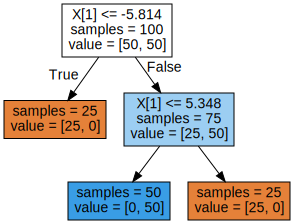

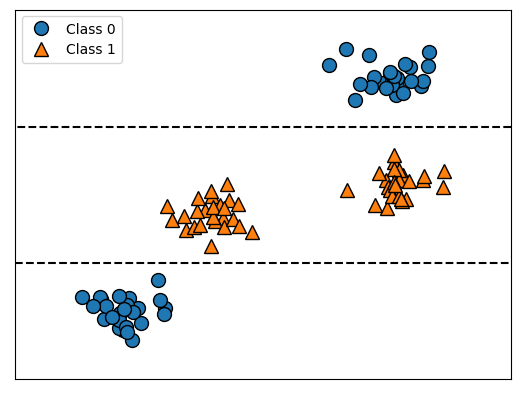

In [12]:
# 특성 중요도의 값은 중요성은 알려주지만 의미는 알수는 없고 특성과 클래스 사이에 복잡한 관계가 있을 수 있음

mglearn.plots.plot_tree_not_monotone()

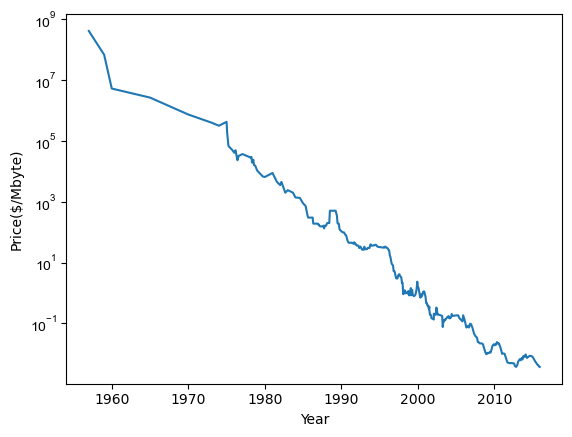

In [14]:
# 로그스케일로 그린 램 가격 동향
import os

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Year')
plt.ylabel("Price($/Mbyte)")
plt.show()

In [17]:
# 램 가격 데이터를 사용해 만든 선형 모델과 회귀 트리의 예측값 비교

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# 2000년 이전을 훈련데이터로, 이후를 테스트 데이터로 분리
data_train=ram_prices[ram_prices.date < 2000]
data_test=ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용
x_train=data_train.date.to_numpy()[:, np.newaxis]

# 타겟 데이터 로그 스케일로 변경(데이터-타겟 관계 단순화)
y_train=np.log(data_train.price)

# 모델 객체 생성 및 훈련
tree=DecisionTreeRegressor().fit(x_train, y_train)
linear_reg=LinearRegression().fit(x_train, y_train)

# 예측은 전체 기간에 대해서 수행
x_all=ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree=tree.predict(x_all)
pred_lr=linear_reg.predict(x_all)

# 예측한 값의 로그 스케일을 되돌림
price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)

# 그래프
plt.semilogy(data_train.date, data_train.price)

In [ ]:
# page118

In [ ]:
# 
---
## 1. 
### 1.1
#### 
---
## 2. 
==================================================
### 2.1 
####

# 기본 모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

# 데이터 불러오기
x, y = mglearn.datasets.make_wave(n_samples=40)

# 훈련 데이터셋과 테스트 데이터셋 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

# 모델 객체 생성 및 훈련
model=LgisticRegression().fit(x_train, y_train)

# 예측
print("훈  련 세트 점수:", model.score(x_train, y_train))
print("테스트 세트 점수:", model.score(x_test, y_test))